## Credit Card Default Status

In [334]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, accuracy_score
import pickle

In [335]:
df = pd.read_csv('dataset.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


#### Data Exploration

In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [337]:
df.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

Consider SEX categorical values as following
- 1 : Male
- 2 : Female

In [338]:
df.PAY_0.value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

PAY columns has 10 categorical values, Lets consider them as following for convenience
- -1 : One month paid in advance
- -2 : Two months paid in advance
- 0 : Paid on-time
- 1 : One month delay
- 2 : Two months delay
- 3 : Three months delay
- 4 : Four months delay
- 5 : Five months delay
- 6 : Six months delay
- 7 : Seven months delay

In [339]:
df.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

Same way consider the marrige categorical data as following
- 0 : Unmarried
- 1 : Married
- 2 : Divorced
- 3 : Widowed

In [340]:
 df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

Consider Education status as following
- 0 : Uneducated
- 1 : Compleled Middle School
- 2 : Completed High School
- 3 : Under Graduate
- 4 : Post Graduate
- 5 : PHD Candidate
- 6 : Others

Text(0.5, 1.0, 'Education vs Credit Limit')

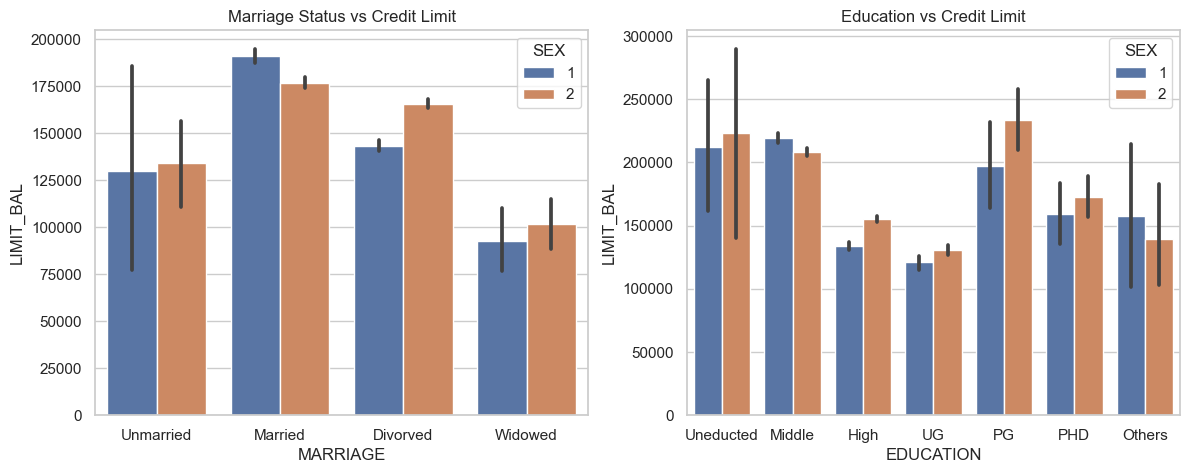

In [341]:
fig, axes = plt.subplots(1, 2, figsize = (14,5))
sns.set_theme(style = 'whitegrid')
marriage = sns.barplot(ax = axes[0], data = df, x = 'MARRIAGE', y = 'LIMIT_BAL', hue = 'SEX')
education = sns.barplot(ax = axes[1], data = df, x = 'EDUCATION', y = 'LIMIT_BAL', hue = 'SEX')
marriage.set_xticklabels(['Unmarried','Married','Divorved','Widowed'])
education.set_xticklabels(['Uneducted','Middle','High','UG','PG','PHD','Others'])
marriage.set_title('Marriage Status vs Credit Limit')
education.set_title('Education vs Credit Limit')

Marriage vs Credit Limit
- Male and Female customers are in same quantity in all sections of marriage.
- Married ppl are the primary card holders at maximum strength
- Widowed are the least credit card holders comparitively

Education vs Credit Limit
- Education has nothing to do with earning power, skill matters !!!!
- Uneducated, middle school and PG degree completed ppls are the top credit card holder
- Also men and women ratio are more or less equal in most of the categories

Text(0.5, 1.0, 'Age vs Credit Limit')

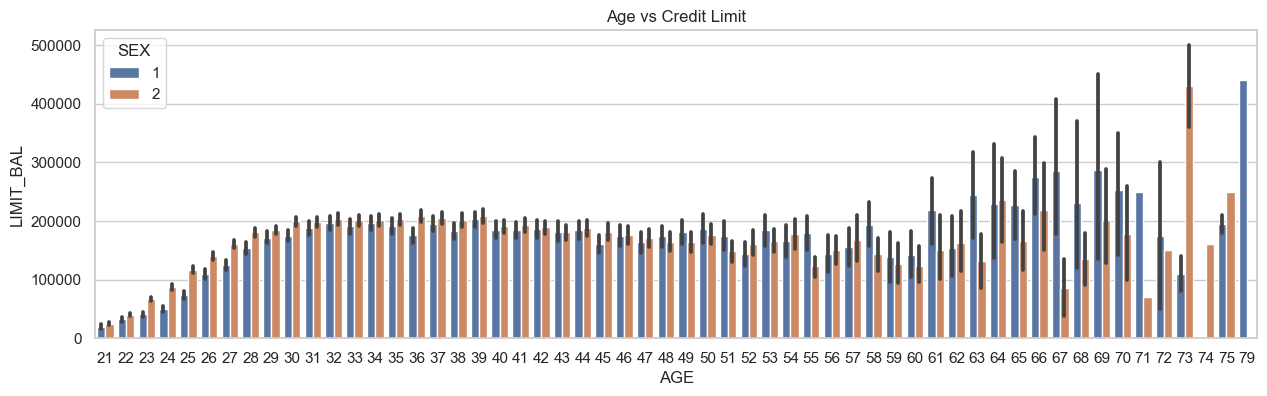

In [342]:
fig, age = plt.subplots(figsize=(15, 4))
age = sns.barplot(data = df, x = 'AGE', y = 'LIMIT_BAL', hue = 'SEX')
age.set_title('Age vs Credit Limit')


Age vs Credit Limit
- Below 25 only few youngsters are using credit cards
- Between 25 - 30 there is sharp incline meaning youngster getting settled with permanent jobs and opt for credit card.
- Between 30 - 55 - No increse or decrease in the pattern
- Above 60 there is a sharp increase for men and decrease for women
- Above 70 there is a drastic increase in credit limit, it might be due to hospital expense at older ages.

Text(0.5, 1.0, 'Default vs Sex')

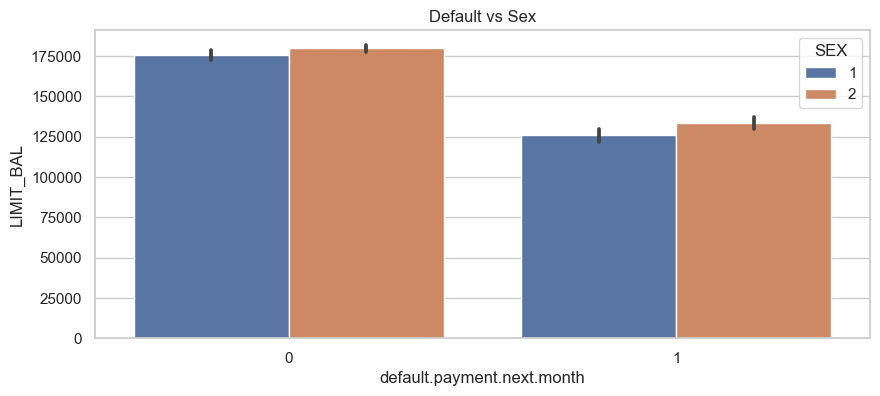

In [343]:
fig, default = plt.subplots(figsize = (10,4))
sns.set_theme(style = 'whitegrid')
default = sns.barplot(data = df, x = 'default.payment.next.month', y = 'LIMIT_BAL', hue = 'SEX')
default.set_title('Default vs Sex')

Default vs Sex
- Higher credit limit holder are less likely to default payment compared to low credit limit holders
- Also male and female ratio are equal in both scenarios

Text(0.5, 1.0, 'Marriage vs Default')

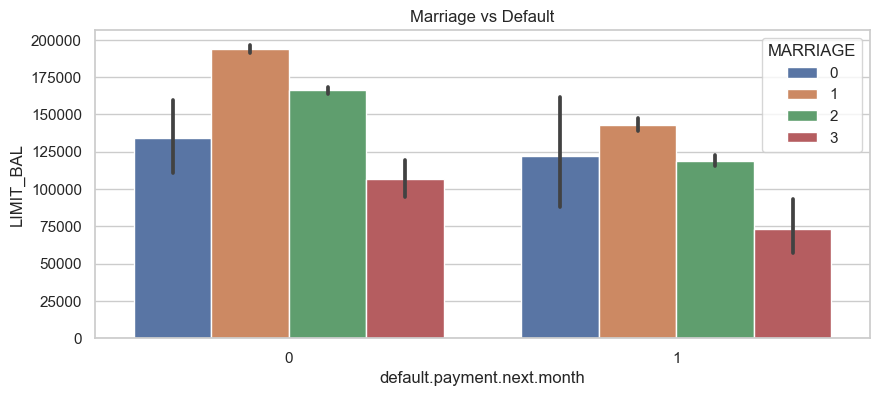

In [344]:
fig, marriage_default = plt.subplots(figsize = (10,4))
marrige_default = sns.barplot(data = df, x = 'default.payment.next.month', y = 'LIMIT_BAL', hue = 'MARRIAGE')
marriage_default.set_title('Marriage vs Default')

Default vs Married Status
- Higer credit limit - less chance of getting default comparitively
- Unmarried ppl with same credit limit has equal chance of getting defaulted and not
- Married ppl are the top in default status followed by unmarried, divorced and widowed

Text(0.5, 1.0, 'Education vs Default')

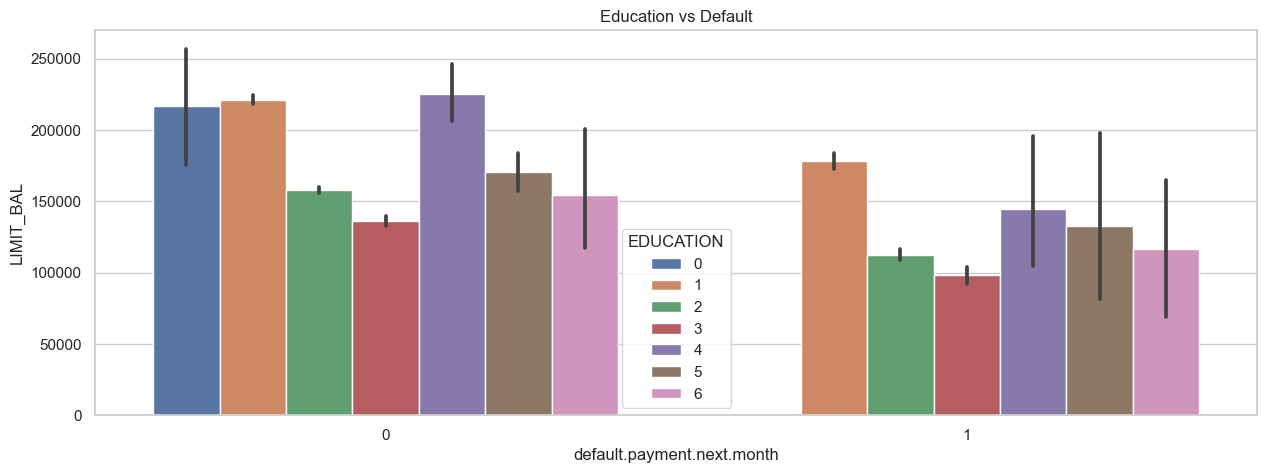

In [345]:
fig, education_default = plt.subplots(figsize = (15,5))
education_default = sns.barplot(data = df, x = 'default.payment.next.month', y = 'LIMIT_BAL', hue = 'EDUCATION')
education_default.set_title('Education vs Default')

Default vs Education
- Unemployed candidates has zero chance of getting defaulted
- PHD candidates are likely in both categories with marginal difference
- Middle school canditates are the top in default status and UG candidates are the least ones

#### Data Cleaning

In [346]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [347]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

Data is clean Lets move into feature engineering section

### Feature Engineering 

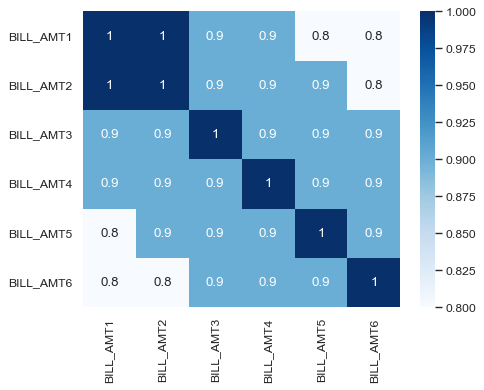

In [348]:
plt.figure(dpi=80)
sns.heatmap(np.round(df[['BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].corr(),1),annot=True, cmap="Blues")

plt.show()

Multicolinearity Issues : We can see high correaltion between all billamount columns. Hence we will retain one billamount column and deleting the remaining ones.

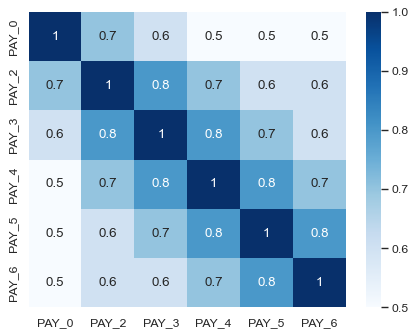

In [349]:
plt.figure(dpi=80)
sns.heatmap(np.round(df[['PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].corr(),1),annot=True, cmap="Blues")
plt.show()

Multicollinearity Issues : Pay columns also has high correlation with remaining pay columns, Hence retaining only one columns of its kind

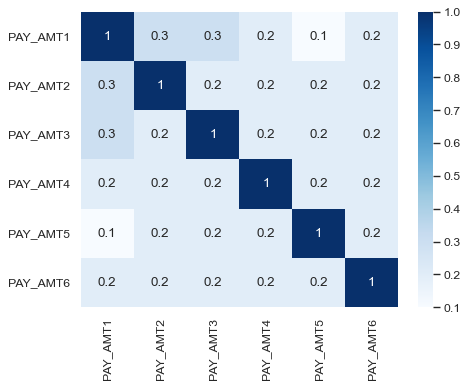

In [350]:
plt.figure(dpi=80)
sns.heatmap(np.round(df[['PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].corr(),1),annot=True, cmap="Blues")
plt.show()

No correlation between the columns, Hence retaining all of its kind

In [351]:
# Deleting colums to remove multicollinearity issue
df.drop(columns = ['ID', 'PAY_6', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'], inplace = True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,3913.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2682.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,29239.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,46990.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,8617.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Running correlation amoung all columns after rectifying multicollinearity.

In [352]:
np.round(df.corr(), 2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
LIMIT_BAL,1.00,0.02,-0.22,-0.11,0.14,-0.27,0.29,0.20,0.18,0.21,0.20,0.22,0.22,-0.15
SEX,0.02,1.00,0.01,-0.03,-0.09,-0.06,-0.03,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,-0.04
EDUCATION,-0.22,0.01,1.00,-0.14,0.18,0.11,0.02,-0.04,-0.03,-0.04,-0.04,-0.04,-0.04,0.03
MARRIAGE,-0.11,-0.03,-0.14,1.00,-0.41,0.02,-0.02,-0.01,-0.01,-0.00,-0.01,-0.00,-0.01,-0.02
AGE,0.14,-0.09,0.18,-0.41,1.00,-0.04,0.06,0.03,0.02,0.03,0.02,0.02,0.02,0.01
PAY_0,-0.27,-0.06,0.11,0.02,-0.04,1.00,0.19,-0.08,-0.07,-0.07,-0.06,-0.06,-0.06,0.32
BILL_AMT1,0.29,-0.03,0.02,-0.02,0.06,0.19,1.00,0.14,0.10,0.16,0.16,0.17,0.18,-0.02
PAY_AMT1,0.20,-0.00,-0.04,-0.01,0.03,-0.08,0.14,1.00,0.29,0.25,0.20,0.15,0.19,-0.07
PAY_AMT2,0.18,-0.00,-0.03,-0.01,0.02,-0.07,0.10,0.29,1.00,0.24,0.18,0.18,0.16,-0.06
PAY_AMT3,0.21,-0.01,-0.04,-0.00,0.03,-0.07,0.16,0.25,0.24,1.00,0.22,0.16,0.16,-0.06


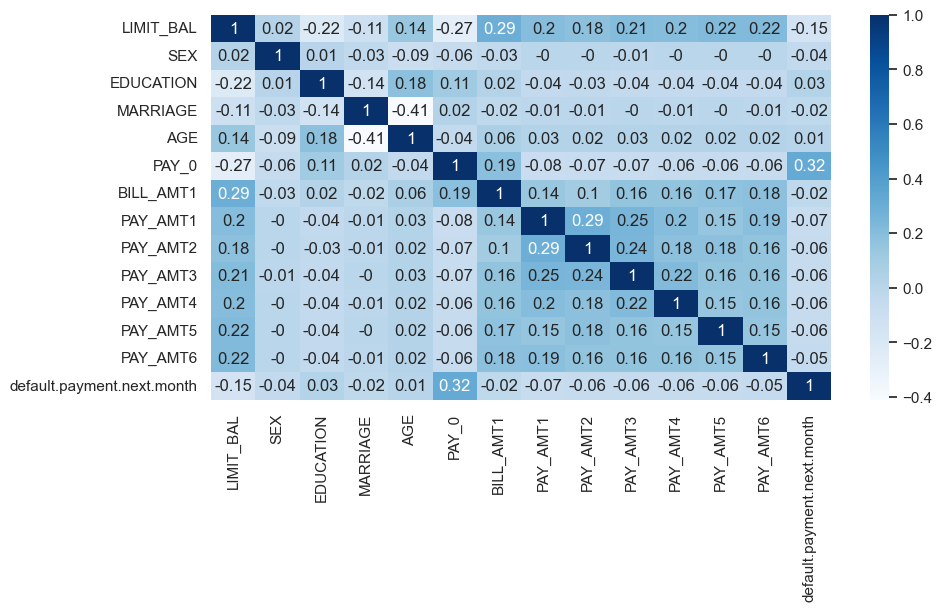

In [353]:
fig, corr = plt.subplots(figsize = (10, 5))
corr = sns.heatmap(np.round(df.corr(), 2),annot=True, cmap="Blues")

As we can see there is no correlation between the features(less than 0.3) and we can use these features for the model build.

In [354]:
y = df['default.payment.next.month']
x = df.iloc[:, :-1]
x.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,3913.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2682.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,29239.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,46990.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,8617.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


### Spliting Dataset

In [355]:
xtrain, xtest, ytrain, ytest = train_test_split(x.values, y.values, train_size=0.80, random_state=10)

### Model Training

In [356]:
from sklearn.pipeline import Pipeline
pipeline_lr = Pipeline([('model', LogisticRegression(max_iter=5000))])
pipeline_svc = Pipeline([('svc_model', SVC())])
pipeline_dc = Pipeline([('dc_model', DecisionTreeClassifier())])
pipeline_rf = Pipeline([('rf_model', RandomForestClassifier())])
pipeline_nb = Pipeline([('guass_model', GaussianNB())])


In [357]:
models = {
    'logistic_regression' : pipeline_lr,
    'SVM' : pipeline_svc,
    'Decision Tree' : pipeline_dc,
    'Random Forest' : pipeline_rf,
    'Naive Bayes' : pipeline_nb
}

def model_prediction(name, model):
        model.fit(xtrain, ytrain)
        ypred = model.predict(xtest)
        precision, recall, f_beta, support = precision_recall_fscore_support(ytest, ypred, beta=2, pos_label=1, average='weighted', zero_division=1)
        auc = roc_auc_score(ytest, ypred)
        accuracy = accuracy_score(ytest, ypred)
        print(f"Model name : {name}")
        print(f"Accuracy is: {accuracy:.2f}")
        print(f"Precision is: {precision:.2f}")
        print(f"Recall is: {recall:.2f}")
        print(f"Fscore is: {f_beta:.2f}")
        print(f"AUC is: {auc:.2f}\n")
        
for name, model in models.items():
    model_prediction(name, model)


Model name : logistic_regression
Accuracy is: 0.78
Precision is: 0.83
Recall is: 0.78
Fscore is: 0.74
AUC is: 0.50

Model name : SVM
Accuracy is: 0.78
Precision is: 0.83
Recall is: 0.78
Fscore is: 0.74
AUC is: 0.50

Model name : Decision Tree
Accuracy is: 0.73
Precision is: 0.73
Recall is: 0.73
Fscore is: 0.73
AUC is: 0.62

Model name : Random Forest
Accuracy is: 0.82
Precision is: 0.80
Recall is: 0.82
Fscore is: 0.81
AUC is: 0.65

Model name : Naive Bayes
Accuracy is: 0.36
Precision is: 0.73
Recall is: 0.36
Fscore is: 0.32
AUC is: 0.55



### Importing Pickle file

In [ ]:
pickle.dump(rf_model, open('credit_default.pkl','wb'))